In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
pd.set_option('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', -1)

C:\Users\sdn11\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [4]:
DATA_PATH = "./data"

In [5]:
import os
os.listdir(DATA_PATH)

['bert_result',
 'data_augmented',
 'data_eval_labels.csv',
 'data_eval_tfidf.csv',
 'data_eval_word2vec.csv',
 'data_josa_removed.csv',
 'data_preprocessed.csv',
 'data_train_labels.csv',
 'hidden_data2_full_distribution.csv',
 'hidden_for_inference.csv',
 'Koelectra_hidden_label.csv',
 'koelectra_result',
 'Koelectra_train_label.csv',
 'list_josa.txt',
 'list_tags_candidates.txt',
 'sample',
 'train_stratified_middle.csv',
 'train_stratified_small.csv',
 'valid_stratified_middle.csv',
 'valid_stratified_small.csv',
 '몽데이크_Open.csv',
 '중단원_summary.csv']

In [6]:
print(os.listdir("./data/bert_result"))
print(os.listdir("./data/koelectra_result"))

['result_epoch_15.csv', 'result_epoch_80.csv', 'result_epoch_80_train.csv']
['test', 'valid']


## For Validation Set

In [7]:
df_koelectra_middle = pd.read_csv("./data/koelectra_result/valid/KoElectra_middle_class_epoch25.csv")
print(df_koelectra_middle.shape)
df_koelectra_middle.head()

(1072, 4)


,Unnamed: 0,qplay_question_id,predict_category,true_category
0,0,4560,H1S1-02,H1S1-02
1,1,12368,HSU1-11,HSU1-11
2,2,4027,H1S1-03,H1S1-03
3,3,7790,HSU1-02,HSU1-02
4,4,9720,H1S2-07,HSTA-02


In [8]:
df_koelectra_small = pd.read_csv("./data/koelectra_result/valid/KoElectra_small_class_epoch25.csv")
print(df_koelectra_small.shape)
df_koelectra_small.head()

(1070, 6)


,Unnamed: 0,qplay_question_id,predict_category,predict_middle_category,true_category,true_middle_category
0,0,8548,HSU1-01-12,HSU1-01,HSU1-01-12,HSU1-01
1,1,9148,HSTA-07-07,HSTA-07,HSTA-07-08,HSTA-07
2,2,17608,H1S2-04-19,H1S2-04,H1S2-04-19,H1S2-04
3,3,7788,HSU1-03-05,HSU1-03,HSU1-03-05,HSU1-03
4,4,25275,H1S2-04-19,H1S2-04,H1S2-04-19,H1S2-04


In [60]:
df_valid2 = pd.read_csv("./data/valid_stratified_small.csv")
print(df_valid2.shape)
df_valid2.head()

(1073, 10)


,Unnamed: 0,qplay_question_id,text,qtid,name,subtitle,question_difficulty,question_type_difficulty,grade,purpose
0,0,8548,"실수 `x`에 대하여 `a^(2x)=sqrt2 - 1`일 때, `(a^(3x)+a^(-3x))/(a^x+a^-x)`의 값은 `iroot()2 -j`이다. `i+j`의 값을 구하시오. (단, `a > 0`)",HSU1-01-12,a^(nx) 꼴을 이용하여 식의 값 구하기,NaN,3,2.0,10,open
1,1,9148,"어느 회사에서 생산하는 통조림의 무게는 평균이 `m``g`, 표준편차가 `3g`인 정규분포를 따른다고 한다. 이 회사에서 통조림 `64`개를 임의추출하여 무게를 조사하였더니 그 평균이 `500g`이었다. 이때, 모평균 `m`에 대한 신뢰도 `95%`의 신뢰구간을 구한 것은? (단, `P(|Z| <= 2)=0.95`)",HSTA-07-08,모평균의 추정 (2),표본표준편차가 주어진 경우,3,3.0,10,open
2,2,17608,"실수 전체의 집합 `R`에서 `R`로의 일대일대응인 두 함수 `f`, `g`에 대하여<br/>`f(1)=5`, `g(3)=4`, `(f^(-1)@g^(-1))(2)=1`, `(g@f)(2)=4`<br/>일 때, `f(2)+g(5)`의 값을 구하여라.",H1S2-04-19,합성함수와 역함수,NaN,3,NaN,10,open
3,3,7788,"지수함수를 이용하여 다음 세 수의 대소관계를 구하면?.<br/> `3`, `root 4 (3^3)`, `root3 (3^4)`",HSU1-03-05,지수함수를 이용한 수의 대소관계 판별,NaN,3,1.0,10,open
4,4,25275,"두 일차함수 `f(x), g(x)`가 모든 실수 `x`에 대하여 `f(x)=f(f(x)+g(x))`, `g(x)=(f@g)(-x)`를 만족시킬 때, `f^-1(1)+g^-1(6)`의 값은?",H1S2-04-19,합성함수와 역함수,NaN,4,NaN,10,open


In [61]:
df = pd.merge(df_koelectra_small,df_valid2, how ='inner', on = ["qplay_question_id"])
print(df.shape)
df.head(2)

(1070, 15)


,Unnamed: 0_x,qplay_question_id,predict_category,predict_middle_category,true_category,true_middle_category,Unnamed: 0_y,text,qtid,name,subtitle,question_difficulty,question_type_difficulty,grade,purpose
0,0,8548,HSU1-01-12,HSU1-01,HSU1-01-12,HSU1-01,0,"실수 `x`에 대하여 `a^(2x)=sqrt2 - 1`일 때, `(a^(3x)+a^(-3x))/(a^x+a^-x)`의 값은 `iroot()2 -j`이다. `i+j`의 값을 구하시오. (단, `a > 0`)",HSU1-01-12,a^(nx) 꼴을 이용하여 식의 값 구하기,NaN,3,2.0,10,open
1,1,9148,HSTA-07-07,HSTA-07,HSTA-07-08,HSTA-07,1,"어느 회사에서 생산하는 통조림의 무게는 평균이 `m``g`, 표준편차가 `3g`인 정규분포를 따른다고 한다. 이 회사에서 통조림 `64`개를 임의추출하여 무게를 조사하였더니 그 평균이 `500g`이었다. 이때, 모평균 `m`에 대한 신뢰도 `95%`의 신뢰구간을 구한 것은? (단, `P(|Z| <= 2)=0.95`)",HSTA-07-08,모평균의 추정 (2),표본표준편차가 주어진 경우,3,3.0,10,open


In [9]:
df_valid = pd.read_csv("./data/valid_stratified_middle.csv")
print(df_valid.shape)
df_valid.head()

(1073, 10)


,Unnamed: 0,qplay_question_id,text,qtid,name,subtitle,question_difficulty,question_type_difficulty,grade,purpose
0,0,4560,"등식 `(a-2)x^2+bx-c+5=0`이 `x`에 대한 항등식이 되도록 하는 상수 `a`, `b`, `c`에 대하여 `a+b+c`의 값은?",H1S1-02,항등식과 계수비교법,NaN,3,1.0,10,open
1,1,12368,"수열 `{a_n}`이 `a_5=4`, `a_9=10`, `a_(n+1)=(a_n+a_(n+2))/2`일 때, `a_15`의 값은? (단, `n=1,2,3,cdots`)",HSU1-11,등차수열의 귀납적 정의,NaN,3,1.0,10,open
2,2,4027,다항식 `xy(x-y)+zx(z-x)+yz(y-z)`를 인수분해하면?,H1S1-03,순환꼴의 인수분해,NaN,3,2.0,10,open
3,3,7790,"`logx`의 정수 부분이 `2`이고, `logx`의 소수 부분이 `logsqrtx`의 소수 부분과 같을 때, `x`의 값을 구하여라.",HSU1-02,로그의 정수 부분과 소수 부분,NaN,3,2.0,10,open
4,4,9720,"집합 `X={1,2,3,4}`에 대하여 집합 `X`에서 `X`로의 함수 `f` 중 다음 조건을 모두 만족시키는 함수 `f`의 개수는?<br/><fieldset><legend></legend>(가) `X`의 임의의 두 원소 `x_1`, `x_2`에 대하여 `x_1 < x_2`이면 `f(x_1) <= f(x_2)`이다.<br/>(나) `f(3) < f(4)`</fieldset>",HSTA-02,중복조합의 활용 (3),함수의 개수,4,3.0,10,open


In [98]:
df_valid_full = df_valid.merge(df_koelectra_middle, how='inner', on='qplay_question_id')
print(df_valid_full.shape)
df_valid_full.head()

(1072, 13)


,Unnamed: 0_x,qplay_question_id,text,qtid,name,subtitle,question_difficulty,question_type_difficulty,grade,purpose,Unnamed: 0_y,predict_category,true_category
0,0,4560,"등식 `(a-2)x^2+bx-c+5=0`이 `x`에 대한 항등식이 되도록 하는 상수 `a`, `b`, `c`에 대하여 `a+b+c`의 값은?",H1S1-02,항등식과 계수비교법,NaN,3,1.0,10,open,0,H1S1-02,H1S1-02
1,1,12368,"수열 `{a_n}`이 `a_5=4`, `a_9=10`, `a_(n+1)=(a_n+a_(n+2))/2`일 때, `a_15`의 값은? (단, `n=1,2,3,cdots`)",HSU1-11,등차수열의 귀납적 정의,NaN,3,1.0,10,open,1,HSU1-11,HSU1-11
2,2,4027,다항식 `xy(x-y)+zx(z-x)+yz(y-z)`를 인수분해하면?,H1S1-03,순환꼴의 인수분해,NaN,3,2.0,10,open,2,H1S1-03,H1S1-03
3,3,7790,"`logx`의 정수 부분이 `2`이고, `logx`의 소수 부분이 `logsqrtx`의 소수 부분과 같을 때, `x`의 값을 구하여라.",HSU1-02,로그의 정수 부분과 소수 부분,NaN,3,2.0,10,open,3,HSU1-02,HSU1-02
4,4,9720,"집합 `X={1,2,3,4}`에 대하여 집합 `X`에서 `X`로의 함수 `f` 중 다음 조건을 모두 만족시키는 함수 `f`의 개수는?<br/><fieldset><legend></legend>(가) `X`의 임의의 두 원소 `x_1`, `x_2`에 대하여 `x_1 < x_2`이면 `f(x_1) <= f(x_2)`이다.<br/>(나) `f(3) < f(4)`</fieldset>",HSTA-02,중복조합의 활용 (3),함수의 개수,4,3.0,10,open,4,H1S2-07,HSTA-02


In [58]:
# valid set 간 행 개수 차이 확인하기
df_valid[df_valid["qplay_question_id"] == 7055]

,Unnamed: 0,qplay_question_id,text,qtid,name,subtitle,question_difficulty,question_type_difficulty,grade,purpose
237,237,7055,다음 중 옳은 것은?,HSU1-06,삼각함수 값의 대소관계 판별,NaN,2,1.0,10,open


In [10]:
miss_koelectra_middle = df_koelectra_middle[df_koelectra_middle["predict_category"] != df_koelectra_middle["true_category"]]
print(miss_koelectra_middle.shape)
miss_koelectra_middle

(116, 4)


,Unnamed: 0,qplay_question_id,predict_category,true_category
4,4,9720,H1S2-07,HSTA-02
12,12,4854,H1S2-03,H1S1-06
13,13,4567,H1S1-01,H1S1-02
29,29,4313,HSTA-02,H1S1-02
33,33,8004,HSU1-05,HSU1-06
38,38,9358,HSTA-03,HSTA-04
57,57,15410,H1S1-04,H1S2-06
65,65,9435,HSTA-03,HSTA-04
70,70,8145,HSU1-01,HSU1-03
73,73,9119,H1S2-07,HSTA-01


In [33]:
miss_koelectra_middle_full = pd.merge(miss_koelectra_middle,df_valid, how ='inner', on = ["qplay_question_id"])
print(miss_koelectra_middle_full.shape)
miss_koelectra_middle_full.head(2)

(116, 13)


,Unnamed: 0_x,qplay_question_id,predict_category,true_category,Unnamed: 0_y,text,qtid,name,subtitle,question_difficulty,question_type_difficulty,grade,purpose
0,4,9720,H1S2-07,HSTA-02,4,"집합 `X={1,2,3,4}`에 대하여 집합 `X`에서 `X`로의 함수 `f` 중 다음 조건을 모두 만족시키는 함수 `f`의 개수는?<br/><fieldset><legend></legend>(가) `X`의 임의의 두 원소 `x_1`, `x_2`에 대하여 `x_1 < x_2`이면 `f(x_1) <= f(x_2)`이다.<br/>(나) `f(3) < f(4)`</fieldset>",HSTA-02,중복조합의 활용 (3),함수의 개수,4,3.0,10,open
1,12,4854,H1S2-03,H1S1-06,12,담장에 길이가 `20m`인 철망을 ㄷ자 모양으로 둘러서 직사각형 모양의 텃밭을 만들려고 한다. 텃밭의 넓이의 최댓값은?,H1S1-06,이차함수의 최대·최소의 활용,NaN,3,2.0,10,open


In [123]:
miss_koelectra_middle_full.groupby("name").size()

name
a^r 꼴이 자연수가 되게 하는 조건 구하기            1
fⁿ 꼴의 합성함수                          1
f∘g에 대한 조건이 주어진 경우                  1
sin²x + cos²x = 1 을 이용해 식의 값 구하기    1
같은 것이 있는 순열 (2)                     1
거듭제곱근                               3
곱셈공식의 활용 (1)                        1
곱셈공식의 활용 (3)                        1
귀납적 정의의 활용                          1
근호를 포함한 수열의 합                       1
나머지가 동일한 자연수의 합                     1
나머지정리의 활용                           2
대칭이동을 이용하여 거리의 최솟값 구하기              1
독립사건의 확률의 활용                        2
두 이차방정식의 근의 판별                      1
두 점 사이의 거리                          1
등비수열 합의 활용                          1
로그의 성질의 활용 (2)                      1
무리식의 값 구하기 (1)                      1
무리식의 값 구하기 (2)                      1
무리함수의 그래프와 직선의 위치 관계                1
무리함수의 합성함수와 역함수                     1
복소수의 뜻과 분류                          1
복잡한 항등식의 계수의 합                      1
부분분수로의 변형                           1
분수 형태의 수열의 합                        1
분할하는 방법

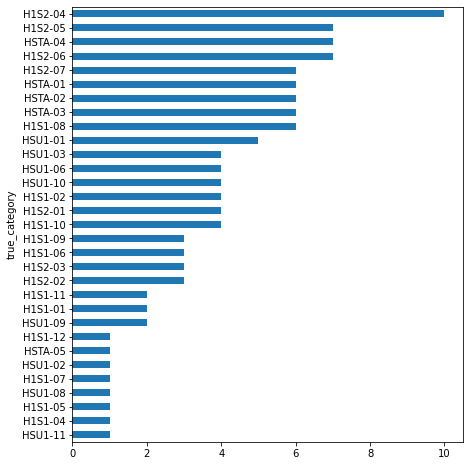

In [21]:
# miss counts in ./koelectra_result/valid/KoElectra_middle_class_epoch25.csv
miss_count = miss_koelectra_middle.groupby("true_category").size().sort_values(ascending=True)

plt.figure(figsize=(7,8))
miss_count.plot.barh()

In [31]:
miss_koelectra_middle.groupby(["true_category", "predict_category"])["qplay_question_id"].count().to_frame()

qplay_question_id
true_category predict_category                   
H1S1-01       H1S1-03           1                
              HSU1-10           1                
H1S1-02       H1S1-01           2                
              HSTA-02           2                
H1S1-04       H1S2-03           1                
H1S1-05       H1S1-08           1                
H1S1-06       H1S2-03           3                
H1S1-07       HSU1-07           1                
H1S1-08       H1S1-02           1                
              H1S2-03           2                
              H1S2-04           1                
              H1S2-07           2                
H1S1-09       H1S1-10           1                
              H1S1-11           1                
              H1S1-12           1                
H1S1-10       H1S1-09           3                
              H1S1-12           1                
H1S1-11       H1S1-09           1                
              H1S1-12           1                
H1S1-12       H1S1-11           1                
H1S2-01       H1S2-02           2                
              H1S2-03           1                
              HSTA-02           1                
H1S2-02       H1S2-01           1                
              H1S2-03           1                
              H1S2-07           1                
H1S2-03       H1S1-08           3                
H1S2-04       H1S1-06           1                
              H1S2-05           3                
              H1S2-06           2                
              H1S2-07           4                
H1S2-05       H1S1-01           3                
              H1S2-03           1                
              H1S2-06           1                
              HSTA-03           1                
              HSU1-10           1                
H1S2-06       H1S1-04           1                
              H1S2-04           1                
              H1S2-05           3                
              HSU1-01           1                
              HSU1-07           1                
H1S2-07       H1S2-04           1                
              HSTA-01           1                
              HSTA-02           3                
              HSU1-10           1                
HSTA-01       H1S2-07           6                
HSTA-02       H1S2-01           1                
              H1S2-07           5                
HSTA-03       H1S2-07           1                
              HSTA-04           3                
              HSTA-05           2                
HSTA-04       H1S2-03           1                
              HSTA-03           6                
HSTA-05       HSTA-03           1                
HSU1-01       H1S1-03           1                
              H1S2-02           1                
              H1S2-07           1                
              HSU1-10           2                
HSU1-02       HSU1-01           1                
HSU1-03       HSU1-01           3                
              HSU1-04           1                
HSU1-06       H1S2-04           1                
              HSU1-05           3                
HSU1-08       H1S2-02           1                
HSU1-09       H1S2-07           1                
              HSU1-10           1                
HSU1-10       H1S2-07           1                
              HSU1-08           1                
              HSU1-11           2                
HSU1-11       HSU1-09           1

## 1) TRUE_CATEGORY = 'HSTA-01' --> PREDICT_CATEGORY = 'H1S2-07' (6)

In [37]:
# Search
TRUE_CATEGORY = 'HSTA-01'
PREDICT_CATEGORY = 'H1S2-07'

condition = (miss_koelectra_middle_full["true_category"] == TRUE_CATEGORY) & (miss_koelectra_middle_full["predict_category"] == PREDICT_CATEGORY)
print("잘못 분류된 수: ", miss_koelectra_middle_full[condition].shape)
miss_koelectra_middle_full[condition][["qplay_question_id", "text", "name", "subtitle"]]

잘못 분류된 수:  (6, 13)


,qplay_question_id,text,name,subtitle
9,9119,"다음 그림과 같이 두 밑면이 정사각형이고, 옆면이 모두 등변사다리꼴인 사각뿔대가 있다. 이 사각뿔대의 `6`개의 면을 서로 다른 `6`가지의 색을 모두 사용하여 칠하려고 할 때, 서로 다르게 색을 칠하는 모든 방법의 수는?",색칠하는 경우의 수,NaN
24,9068,"두 집합 `X={a, b, c, d, e}`와 `Y={1, 2, 3}`에 대하여 `X`에서 `Y`로의 함수 중에서 공역과 치역이 같은 함수의 개수는?",중복순열의 활용 (2),함수의 개수
78,9608,"아래 그림과 같이 두 밑면이 정사각형이고, 옆면이 모두 등변사다리꼴인 사각뿔대가 있다. 이 사각뿔대의 `6`개의 면을 서로 다른 `6`가지의 색을 모두 사용하여 칠하려고 할 때, 서로 다르게 색을 칠하는 모든 방법의 수는?",색칠하는 경우의 수,NaN
98,9134,"다음 그림은 중심을 지나는 `3`개의 선분으로 `6`등분한 큰 원에 중심이 일치하는 작은 원을 놓은 것이다. `7`개의 부분으로 나누어진 이 도형을 서로 다른 `7`가지 색을 모두 사용하여 칠하는 방법의 수는? (단, 회전하여 일치하는 경우는 같은 것으로 본다.)",색칠하는 경우의 수,NaN
107,9460,"서로 다른 종류의 사탕 `5`개를 `4`명의 학생 `A`, `B`, `C`, `D`에게 남김없이 나누어 주는 경우의 수는? (단, 사탕을 받지 못하는 학생이 있을 수 있다.)",중복순열,NaN
109,9027,`5556.78`에서 숫자의 순서를 바꾸어 소수점 이하를 버리면 서로 다른 정수가 몇 개 생기는가?,같은 것이 있는 순열 (2),자연수의 개수


In [39]:
# 전체 valid set에서 keyword 기반으로 search
keyword = '색칠하는 경우의 수'

# 조건를 충족하는 데이터를 필터링
contains_keyword = df_valid['name'].str.contains(keyword)
subset_df = df_valid[contains_keyword]

print(subset_df.shape)
print(subset_df['qplay_question_id'].unique())
subset_df.head()

(4, 10)
[9119 9608 9135 9134]


,Unnamed: 0,qplay_question_id,text,qtid,name,subtitle,question_difficulty,question_type_difficulty,grade,purpose
73,73,9119,"다음 그림과 같이 두 밑면이 정사각형이고, 옆면이 모두 등변사다리꼴인 사각뿔대가 있다. 이 사각뿔대의 `6`개의 면을 서로 다른 `6`가지의 색을 모두 사용하여 칠하려고 할 때, 서로 다르게 색을 칠하는 모든 방법의 수는?",HSTA-01,색칠하는 경우의 수,NaN,3,2.0,10,open
678,678,9608,"아래 그림과 같이 두 밑면이 정사각형이고, 옆면이 모두 등변사다리꼴인 사각뿔대가 있다. 이 사각뿔대의 `6`개의 면을 서로 다른 `6`가지의 색을 모두 사용하여 칠하려고 할 때, 서로 다르게 색을 칠하는 모든 방법의 수는?",HSTA-01,색칠하는 경우의 수,NaN,3,2.0,10,open
712,712,9135,"그림과 같이 밑면과 윗면이 정사각형이고 옆면은 모두 합동인 평행사변형으로 이루어진 정사각뿔대가 있다. 서로 다른 `6`가지 색을 모두 사용하여 정사각뿔대의 `6`면을 서로 다른 색으로 칠하는 방법의 수를 구하시오,",HSTA-01,색칠하는 경우의 수,NaN,3,2.0,10,open
903,903,9134,"다음 그림은 중심을 지나는 `3`개의 선분으로 `6`등분한 큰 원에 중심이 일치하는 작은 원을 놓은 것이다. `7`개의 부분으로 나누어진 이 도형을 서로 다른 `7`가지 색을 모두 사용하여 칠하는 방법의 수는? (단, 회전하여 일치하는 경우는 같은 것으로 본다.)",HSTA-01,색칠하는 경우의 수,NaN,3,2.0,10,open


In [84]:
df_all[(df_all['name'] == '색칠하는 경우의 수') | (df_all['name'] == '색칠하는 방법의 수')]

,qplay_question_id,text,qtid,name,subtitle,question_difficulty,question_type_difficulty,grade,purpose
266,9135,"그림과 같이 밑면과 윗면이 정사각형이고 옆면은 모두 합동인 평행사변형으로 이루어진 정사각뿔대가 있다. 서로 다른 `6`가지 색을 모두 사용하여 정사각뿔대의 `6`면을 서로 다른 색으로 칠하는 방법의 수를 구하시오,",HSTA-01-02,색칠하는 경우의 수,NaN,3,2.0,10,open
279,9070,"한 변의 길이가 `2`인 정사각형의 각 꼭짓점을 중심으로 하고 반지름의 길이가 `1`인 원의 일부분을 그림과 같이 정사각형의 내부에 그렸다. 이 정사각형의 `5`개의 영역을 서로 다른 `5`가지의 색을 모두 사용하여 색칠하는 경우의 수는? (단, 한 영역에 한 가지 색만 칠하고, 회전하여 일치하는 것은 같은 것으로 본다.)",HSTA-01-02,색칠하는 경우의 수,NaN,3,2.0,10,open
706,24953,"정육면체의 각 면을 서로 다른 `6`가지 색을 칠하고, 각 면에 `1`부터 `6`까지의 숫자를 쓰려고 한다. 이 때, 마주보는 면에 적힌 수의 합이 `7`이 되도록 쓰는 방법의 수는? (단, 정육면체를 회전시켰을 때 일치하는 경우는 같은 경우로 본다.)",H1S2-07-08,색칠하는 방법의 수,NaN,3,NaN,10,open
1094,25007,모든 모서리의 길이가 다른 사면체의 여섯 개의 모서리 가운데 몇 개의 모서리를 골라 붉은 색으로 칠하는 방법 중에서 붉은 색의 모서리를 따라 네 꼭짓점이 모두 연결되는 경우의 수는?,H1S2-07-08,색칠하는 방법의 수,NaN,5,NaN,10,open
1132,24140,"그림은 어느 도시를 `4`개의 영역으로 나누어 놓은 지도이다. 이 지도의 `A`, `B`, `C`, `D` `4`개의 영역을 한 영역은 한가지 색으로만 칠하라고 한다. 파랑, 빨강, 노랑, 초록 `4`가지 색의 일부 또는 전부를 사용하여 변을 공유하는 영역은 서로 다른 색으로 칠하는 방법의 수는?",H1S2-07-08,색칠하는 방법의 수,NaN,3,NaN,10,open
1135,24595,"그림과 같이 `A`, `B`, `C`, `D`, `E`, `F`의 `6`개의 영역으로 나누어 놓은 지도와 서로 다른 `5`가지 색상이 있다. `6`개의 영역에 `5`가지 이하의 색을 이용하여 지도를 칠하려고 한다. 같은 색을 중복하여 이용해도 좋으나 인접한 영역은 서로 다른 색으로 칠할 때 그 경우의 수를 구하시오.",H1S2-07-08,색칠하는 방법의 수,NaN,3,NaN,10,open
1184,25141,"다음 그림과 같은 직사각형 `A`, `B`, `C`, `D`, `E` `5`개에 `4`가지 색을 전부 또는 일부를 사용하여 색칠하려고 한다. 이웃한 직사각형에는 서로 다른 색을 칠하고, 맨 위의 직사각형 `A`와 맨 아래의 직사각형 `E`에는 같은 색을 칠할 때 `5`개의 직사각형 모두에 색을 칠하는 경우의 수를 구하시오.",H1S2-07-08,색칠하는 방법의 수,NaN,3,NaN,10,open
1272,24621,"그림과 같은 정이십면체의 한 면에 한 가지 색만 칠할 때, 모든 면에 `20`가지 색을 모두 사용하여 칠하는 경우의 수는?",H1S2-07-08,색칠하는 방법의 수,NaN,4,NaN,10,open
1399,25048,"다음 그림의 영역 `A`, `B`, `C`, `D` `4`개를 서로 다른 `5`가지 색으로 칠하려고 한다. 같은 색을 여러 번 사용해도 좋으나 인접하는 영역은 서로 다른 색으로 칠하는 모든 방법의 수는?",H1S2-07-08,색칠하는 방법의 수,NaN,3,NaN,10,open
1538,25052,"`6`가지 색을 가지고 `8`등분된 원판에 색칠을 할 때, 어두운 곳 `4`곳은 `2`색으로 마주보는 부분끼리 같은 색으로 칠하려고 한다. 색칠하는 경우의 수는?",H1S2-07-08,색칠하는 방법의 수,NaN,4,NaN,10,open


In [83]:
df_all[(df_all['name'] == '색칠하는 경우의 수') | (df_all['name'] == '색칠하는 방법의 수')].groupby(['qtid']).size()

qtid
H1S2-07-08    37
HSTA-01-02    9 
dtype: int64

In [77]:
KEYWORD = '칠하는 경우'

df_all = pd.read_csv("./data/몽데이크_Open.csv")
print(df_all.shape)
subset_df = df_all[df_all['text'].str.contains(KEYWORD)]
print(subset_df.groupby(['qtid']).size())
subset_df

(5364, 9)
qtid
H1S2-07-08    9
HSTA-01-02    1
dtype: int64


,qplay_question_id,text,qtid,name,subtitle,question_difficulty,question_type_difficulty,grade,purpose
279,9070,"한 변의 길이가 `2`인 정사각형의 각 꼭짓점을 중심으로 하고 반지름의 길이가 `1`인 원의 일부분을 그림과 같이 정사각형의 내부에 그렸다. 이 정사각형의 `5`개의 영역을 서로 다른 `5`가지의 색을 모두 사용하여 색칠하는 경우의 수는? (단, 한 영역에 한 가지 색만 칠하고, 회전하여 일치하는 것은 같은 것으로 본다.)",HSTA-01-02,색칠하는 경우의 수,NaN,3,2.0,10,open
1184,25141,"다음 그림과 같은 직사각형 `A`, `B`, `C`, `D`, `E` `5`개에 `4`가지 색을 전부 또는 일부를 사용하여 색칠하려고 한다. 이웃한 직사각형에는 서로 다른 색을 칠하고, 맨 위의 직사각형 `A`와 맨 아래의 직사각형 `E`에는 같은 색을 칠할 때 `5`개의 직사각형 모두에 색을 칠하는 경우의 수를 구하시오.",H1S2-07-08,색칠하는 방법의 수,NaN,3,NaN,10,open
1272,24621,"그림과 같은 정이십면체의 한 면에 한 가지 색만 칠할 때, 모든 면에 `20`가지 색을 모두 사용하여 칠하는 경우의 수는?",H1S2-07-08,색칠하는 방법의 수,NaN,4,NaN,10,open
1538,25052,"`6`가지 색을 가지고 `8`등분된 원판에 색칠을 할 때, 어두운 곳 `4`곳은 `2`색으로 마주보는 부분끼리 같은 색으로 칠하려고 한다. 색칠하는 경우의 수는?",H1S2-07-08,색칠하는 방법의 수,NaN,4,NaN,10,open
2335,25192,옆면이 모두 합동인 오각뿔대의 각 면을 서로 다른 `7`가지 색을 모두 이용하여 칠하는 경우의 수는?,H1S2-07-08,색칠하는 방법의 수,NaN,3,NaN,10,open
2929,18131,"다음 그림과 같이 `A`, `B`, `C`, `D`, `E` `5`개의 영역을 `5`가지 색으로 칠하려고 한다. 같은 색을 중복하여 사용해도 좋으나 인접한 부분은 서로 다른 색으로 칠할 때, 칠하는 경우의 수를 구하여라. (단, `B`, `C`, `D`, `E`는 서로 합동이다.)",H1S2-07-08,색칠하는 방법의 수,NaN,3,NaN,10,open
4212,24985,"다음 그림과 같이 구분된 `5`개의 영역을 서로 다른 `4`가지 색을 전부 사용하여 칠하려고 한다. 이웃한 영역은 서로 다른 색으로 칠하여 구분할 때, 칠하는 경우의 수는?",H1S2-07-08,색칠하는 방법의 수,NaN,3,NaN,10,open
5020,25340,"빨강, 파랑, 노랑, 초록, 검정의 `5`가지 색연필을 이용하여 다음 그림을 칠하려고 한다. 같은 색을 중복하여 이용해도 좋으나 인접한 영역은 서로 다른 색으로 칠할 때, 색을 칠하는 경우의 수는? (단, `5`가지 색연필을 모두 사용하지 않아도 된다.)",H1S2-07-08,색칠하는 방법의 수,NaN,3,NaN,10,open
5152,24679,"빨강, 파랑, 노랑, 초록의 `4`가지 색연필을 모두 이용하여 아래의 그림을 칠하려고 한다. 같은 색을 중복하여 이용해도 좋으나 인접한 영역은 서로 다른 색으로 칠할 때, 색을 칠하는 경우의 수는?",H1S2-07-08,색칠하는 방법의 수,NaN,3,NaN,10,open
5194,18340,다음 지도의 `5`개의 영역을 서로 다른 `4`가지 색으로 칠하려고 한다. 같은 색을 중복해서 사용할 수 있으나 이웃하는 두 영역은 서로 다른 색으로 칠하는 경우의 수는?,H1S2-07-08,색칠하는 방법의 수,NaN,3,NaN,10,open


## 2) TRUE_CATEGORY = 'HSTA-04' --> PREDICT_CATEGORY = 'HSTA-03' (6)

In [85]:
# Search
TRUE_CATEGORY = 'HSTA-04'
PREDICT_CATEGORY = 'HSTA-03'

condition = (miss_koelectra_middle_full["true_category"] == TRUE_CATEGORY) & (miss_koelectra_middle_full["predict_category"] == PREDICT_CATEGORY)
print("잘못 분류된 수: ", miss_koelectra_middle_full[condition].shape)
miss_koelectra_middle_full[condition][["qplay_question_id", "text", "name", "subtitle"]]

잘못 분류된 수:  (6, 13)


,qplay_question_id,text,name,subtitle
5,9358,"어느 회사 사원모집에서 경수, 정국, 지호가 시험에 통과할 확률이 각각 `4/5`, `3/4`, `2/3` 일 때, `3`명 중 `1`명만 합격할 확률은?",독립사건의 확률의 활용,NaN
7,9435,"두 사건 `A`, `B`에 대하여 `P(A)=1/3`, `P(B)=2/5`, `P(A|B)+P(B|A)=11/12`일 때, `P(AnnB)`를 구하면?",조건부확률의 계산,NaN
14,9447,"두 사건 `A`, `B`에 대하여 `P(A) = 1/4`, `P(B) = 1/2`, `P(B|A) = 1/3`일 때, `P(B^C|A^C)`을 구하여라.",조건부확률의 계산,NaN
37,9424,"두 사건 `A`, `B`에 대하여 `P(B)=1/3`, `P(AuuB)=2/3`, `P(A|B)=1/2`일 때, `P(A|B^C)`을 구하면?",조건부확률의 계산,NaN
55,9785,"어느 학급 학생 `33`명은 표와 같이 중국어와 일본어 중에서 한 과목을 선택하여 수업을 받는다고 한다. 이 학급 학생 중에서 임의로 택한 한 명이 일본어 수업을 받는다고 할 때, 그 학생이 여학생일 확률은?",조건부확률,NaN
70,9357,"두 사격 선수 `A`, `B`의 `10`점 명중률은 각각 `0.8`, `0.7`이다. 두 선수가 각각 한 번씩 사격을 할 때, `A`, `B` 중 적어도 한 명은 `10`점에 명중시킬 확률 `b`에 대하여 `100b`의 값을 구하시오.",독립사건의 확률의 활용,NaN


In [91]:
# HSTA-04(true)단원 / HSTA-03(predict) 단원 체크
print(df_all[df_all['qtid'].str.contains("HSTA-04")]['name'].unique())
print(df_all[df_all['qtid'].str.contains("HSTA-03")]['name'].unique())

['조건부확률의 계산' '조건부확률' '독립시행의 확률의 활용' '독립사건의 확률' '사건의 독립과 종속 판정하기'
 '확률의 곱셈정리 (2)' '확률의 곱셈정리와 조건부확률' '독립사건의 확률의 활용' '독립시행의 확률' '확률의 곱셈정리 (1)'
 '사건의 독립과 종속의 성질']
['수학적 확률' '중복순열과 확률' '시행과 사건' '확률의 덧셈정리 (2)' '확률의 기본 성질' '여사건의 확률 (2)'
 '원순열과확률' '여사건의 확률 (1)' '기하적 확률' '순열과 확률' '확률의 덧셈정리 (1)' '조합과 확률'
 '확률의 덧셈정리와 여사건의 확률' '통계적 확률' '같은 것이 있는 순열과 확률']


In [104]:
# 전체 valid set에서 keyword 기반으로 search
keyword = "\|"

# 조건를 충족하는 데이터를 필터링
contains_keyword = df_valid_full['text'].str.contains(keyword)
subset_df = df_valid_full[contains_keyword]

print("valid 전체에서 keyword 가진 레코드의 수:", subset_df.shape)
print(subset_df['name'].unique(),' \n')

# | 를 포함한 문제 중, miss predict 한 데이터
miss_subset_df = subset_df[subset_df["predict_category"] != subset_df["true_category"]]
print("그 중 miss predict한 레코드의 수:", miss_subset_df.shape)
print(miss_subset_df['name'].unique())
miss_subset_df

valid 전체에서 keyword 가진 레코드의 수: (69, 13)
['연립이차부등식' '신뢰구간의 길이 (2)' '무리함수의 그래프와 직선의 위치 관계' '모평균의 추정 (3)' '조건부확률의 계산'
 '함수의 정의역, 공역, 치역' '명제가 참이 되도록 하는 상수 구하기' '일대일대응이 되도록 하는 미지수 구하기'
 '유리함수의 최대·최소' '절댓값 기호가 포함된 삼각함수' '유리함수 그래프의 활용'
 '이차방정식이 절댓값 또는 가우스 기호를 포함한 경우' '유리함수와 무리함수의 그래프' '무리함수의 정의역과 치역'
 'x+y 와 xy 로 이루어진 연립방정식' '무리함수의 그래프의 성질' '모평균의 추정 (1)' '모평균과 표본평균의 차'
 '유리함수의 정의역과 치역' '특정한 원소를 갖는(갖지 않는) 부분집합의 개수' '절댓값 기호를 포함한 절대부등식'
 '삼각함수의 값의 부호' '유리함수의 합성' '집합의 표현' '정수 및 자연수 조건을 갖는 부정방정식'
 '절댓값 또는 가우스 기호가 포함된 이차부등식' '조건을 만족시키는 집합 구하기' 'fⁿ 꼴의 합성함수'
 '두 개 이상의 절댓값 기호를 포함한 함수' '절댓값 기호를 포함한 함수' '이항계수의 성질' '함수의 그래프와 역함수의 함숫값'
 '방정식 또는 부등식의 해의 집합의 연산' '무리함수의 최대와 최소' '모평균의 추정 (2)' '인수정리를 이용한 인수분해'
 '사건의 독립과 종속의 성질' '조건을 만족시키는 함수의 개수' '신뢰구간의 길이 (1)'
 'A⊂X⊂B를 만족시키는 집합 X의 개수' '절댓값 기호가 포함된 일차부등식' '일대일대응 찾기' '특수한 해를 갖는 일차부등식'
 '함수와 역함수의 교점' '삼각함수를 포함한 식의 최대, 최소 (2)' '원의 접선의 방정식 (2)'
 '역함수가 존재하기 위한 조건']  

그 중 miss predict한 레코드의 수: (6, 13)
['조건부확률의 계산' '집합의 표현' '조건을 만족시키는 집합 구하기' '이항계수의 성질']


,Unnamed: 0_x,qplay_question_id,text,qtid,name,subtitle,question_difficulty,question_type_difficulty,grade,purpose,Unnamed: 0_y,predict_category,true_category
65,65,9435,"두 사건 `A`, `B`에 대하여 `P(A)=1/3`, `P(B)=2/5`, `P(A|B)+P(B|A)=11/12`일 때, `P(AnnB)`를 구하면?",HSTA-04,조건부확률의 계산,NaN,3,2.0,10,open,65,HSTA-03,HSTA-04
97,97,9447,"두 사건 `A`, `B`에 대하여 `P(A) = 1/4`, `P(B) = 1/2`, `P(B|A) = 1/3`일 때, `P(B^C|A^C)`을 구하여라.",HSTA-04,조건부확률의 계산,NaN,3,2.0,10,open,97,HSTA-03,HSTA-04
295,296,9424,"두 사건 `A`, `B`에 대하여 `P(B)=1/3`, `P(AuuB)=2/3`, `P(A|B)=1/2`일 때, `P(A|B^C)`을 구하면?",HSTA-04,조건부확률의 계산,NaN,3,2.0,10,open,295,HSTA-03,HSTA-04
424,425,19400,"자연수 `n`에 대하여 집합 `A_n`을 `A_n={x||x/n -2| <= 1, x`는 자연수`}`라 하고, `S_n`을 집합 `A_n`의 모든 원소들의 합이라 한다. 이 때, `S_1+S_2+S_3`의 값을 구하여라.",H1S2-01,집합의 표현,"조건제시법, 원소나열법, 벤다이어그램",4,NaN,10,open,424,H1S2-02,H1S2-01
504,505,19694,"실수 전체집합의 두 부분집합 `A`, `B`가 다음 두 조건을 만족한다.<fieldset>(가) `1 ln A`<br/>(나) `x ln A`이면 `x+1 ln A`이고 `x-1 ln B`</fieldset> 이 때, 두 집합 `A`, `B`에 대한 다음 <보기>의 설명 중 옳은 것을 모두 고르면?<fieldset><legend>|보기|</legend>ㄱ. `A`는 모든 자연수를 원소로 갖는다.<br/>ㄴ. `A`는 `B`의 부분집합이다.<br/>ㄷ. `B`의 원소 중 최댓값이 존재한다.<br/>ㄹ. `B`는 정수 전체집합의 부분집합이다.</fieldset>",H1S2-01,조건을 만족시키는 집합 구하기,NaN,4,NaN,10,open,504,H1S2-03,H1S2-01
603,604,9537,집합 `A={x|x`는 `12` 이하의 자연수`}`의 부분집합 중 원소의 개수가 홀수인 것의 개수는?,HSTA-02,이항계수의 성질,NaN,3,3.0,10,open,603,H1S2-01,HSTA-02


In [105]:
# 전체 valid set에서 keyword 기반으로 search
keyword = '조건부확률의 계산'

# 조건를 충족하는 데이터를 필터링
contains_keyword = df_valid_full['name'].str.contains(keyword)
subset_df = df_valid_full[contains_keyword]

print(subset_df.shape)
print(subset_df['qplay_question_id'].unique())
subset_df.head()

(4, 13)
[9435 9447 9424 9433]


,Unnamed: 0_x,qplay_question_id,text,qtid,name,subtitle,question_difficulty,question_type_difficulty,grade,purpose,Unnamed: 0_y,predict_category,true_category
65,65,9435,"두 사건 `A`, `B`에 대하여 `P(A)=1/3`, `P(B)=2/5`, `P(A|B)+P(B|A)=11/12`일 때, `P(AnnB)`를 구하면?",HSTA-04,조건부확률의 계산,NaN,3,2.0,10,open,65,HSTA-03,HSTA-04
97,97,9447,"두 사건 `A`, `B`에 대하여 `P(A) = 1/4`, `P(B) = 1/2`, `P(B|A) = 1/3`일 때, `P(B^C|A^C)`을 구하여라.",HSTA-04,조건부확률의 계산,NaN,3,2.0,10,open,97,HSTA-03,HSTA-04
295,296,9424,"두 사건 `A`, `B`에 대하여 `P(B)=1/3`, `P(AuuB)=2/3`, `P(A|B)=1/2`일 때, `P(A|B^C)`을 구하면?",HSTA-04,조건부확률의 계산,NaN,3,2.0,10,open,295,HSTA-03,HSTA-04
825,826,9433,"두 사건 `A`, `B`에 대하여 `P(A^C) = 3/5`, `P(A^C nn B^C) = 1/5`, `P(B|A) = 1/2`일 때, `P(A|B)`의 값은?",HSTA-04,조건부확률의 계산,NaN,3,2.0,10,open,825,HSTA-04,HSTA-04


In [89]:
# 전체 Open dataset에서 HSTA-04 문제를 살펴보자
df_all[df_all['qtid'].str.contains("HSTA-04")]

,qplay_question_id,text,qtid,name,subtitle,question_difficulty,question_type_difficulty,grade,purpose
104,9433,"두 사건 `A`, `B`에 대하여 `P(A^C) = 3/5`, `P(A^C nn B^C) = 1/5`, `P(B|A) = 1/2`일 때, `P(A|B)`의 값은?",HSTA-04-01,조건부확률의 계산,NaN,3,2.0,10,open
198,9471,"다음 표는 어느 수학경시대회에 참가한 학생 `30`명을 조사한 표이다. 이 대회에 참가한 학생 중에서 임의로 택한 한 명이 남학생이었을 때, 그 학생이 `2`학년일 확률은?",HSTA-04-02,조건부확률,NaN,3,2.0,10,open
267,9355,"수직선 위에 점 `P(0)`이 있다. 두 개의 동전을 던져서 모두 앞면이 나오면 점 `P`는 오른쪽으로 `1`만큼 움직이고, 그 외의 경우가 나오면 점 `P`는 왼쪽으로 `1`만큼 움직인다. 동전을 일곱 번 던졌을 때, 점 `P`의 좌표가 `3`일 확률은?",HSTA-04-11,독립시행의 확률의 활용,NaN,3,3.0,10,open
269,9607,"두 사건 `A`, `B`가 서로 독립이고 `P(A)=1/3`, `P(AnnB)=1/6`일 때, `P(B)`의 값은?",HSTA-04-08,독립사건의 확률,NaN,3,2.0,10,open
348,9382,"한 개의 주사위를 던질 때, 짝수의 눈이 나오는 사건을 `A`, `n(1 <= n <= 6)`의 약수의 눈이 나오는 사건을 `B`라 하자. 두 사건 `A`와 `B`가 서로 독립이 되도록 하는 모든 자연수 `n`의 값의 합을 구하시오.",HSTA-04-06,사건의 독립과 종속 판정하기,NaN,4,2.0,10,open
382,9421,"흰색 탁구공 `5`개와 주황색 탁구공 `8`개가 들어 있는 주머니에서 임의로 탁구공을 한 개씩 두 번 꺼낼 때, 두 번째에 주황색 탁구공이 나올 확률은?<br/>(단, 꺼낸 공은 다시 넣지 않는다.)",HSTA-04-04,확률의 곱셈정리 (2),P(E)=P(A∩E)+P(Aᶜ∩E),3,2.0,10,open
465,9751,"수직선 위에 원점 `O`에 있는 점 `P`를 동전을 한 번 던져 앞면이 나오면 오른쪽으로 `1`만큼 움직이고, 뒷면이 나오면 왼쪽으로 `1`만큼 움직인다. 동전을 `6`번 던졌을 때, 점 `P`의 좌표가 `2`일 확률을 구하면?",HSTA-04-11,독립시행의 확률의 활용,NaN,3,3.0,10,open
480,9345,"두 사건 `A`, `B`가 서로 독립이고 `P(A)=1/4`, `P(A^CnnB)=3/8`일 때, `P(B)`의 값은?",HSTA-04-08,독립사건의 확률,NaN,3,2.0,10,open
481,9689,"세 사건 `A`, `B`, `C`에 대하여 두 사건 `A`, `B`는 서로 독립이고, 두 사건 `B`, `C`는 서로 배반이다.<br/>`P(A)=3/4`, `P(AnnB)=1/5`, `P(BuuC)=1/2`<br/>일 때, `P(C)`를 구하면?",HSTA-04-08,독립사건의 확률,NaN,3,2.0,10,open
524,9391,"상자 `A`에는 노란구슬 `3`개와 파란구슬 `3`개, 상자 `B`에는 노란구슬 `4`개와 파란구슬 `2`개가 각각 들어 있다. 두 상자 `A`, `B` 중에서 한 상자를 임의로 택하고 그 상자에서 `2`개의 구슬을 임의로 꺼냈더니 노란구슬 `2`개가 나왔다. 택한 상자가 `B`일 확률은?",HSTA-04-05,확률의 곱셈정리와 조건부확률,NaN,3,3.0,10,open


#### 소단원에서는 어떻게 예측하고 있을까?

In [106]:
df_koelectra_small = pd.read_csv("./data/koelectra_result/valid/KoElectra_small_class_epoch25.csv")
print(df_koelectra_small.shape)
df_koelectra_small.head()

(1070, 6)


,Unnamed: 0,qplay_question_id,predict_category,predict_middle_category,true_category,true_middle_category
0,0,8548,HSU1-01-12,HSU1-01,HSU1-01-12,HSU1-01
1,1,9148,HSTA-07-07,HSTA-07,HSTA-07-08,HSTA-07
2,2,17608,H1S2-04-19,H1S2-04,H1S2-04-19,H1S2-04
3,3,7788,HSU1-03-05,HSU1-03,HSU1-03-05,HSU1-03
4,4,25275,H1S2-04-19,H1S2-04,H1S2-04-19,H1S2-04


In [108]:
df_valid_small = pd.read_csv("./data/valid_stratified_small.csv")
print(df_valid_small.shape)
df_valid_small.head(2)

(1073, 10)


,Unnamed: 0,qplay_question_id,text,qtid,name,subtitle,question_difficulty,question_type_difficulty,grade,purpose
0,0,8548,"실수 `x`에 대하여 `a^(2x)=sqrt2 - 1`일 때, `(a^(3x)+a^(-3x))/(a^x+a^-x)`의 값은 `iroot()2 -j`이다. `i+j`의 값을 구하시오. (단, `a > 0`)",HSU1-01-12,a^(nx) 꼴을 이용하여 식의 값 구하기,NaN,3,2.0,10,open
1,1,9148,"어느 회사에서 생산하는 통조림의 무게는 평균이 `m``g`, 표준편차가 `3g`인 정규분포를 따른다고 한다. 이 회사에서 통조림 `64`개를 임의추출하여 무게를 조사하였더니 그 평균이 `500g`이었다. 이때, 모평균 `m`에 대한 신뢰도 `95%`의 신뢰구간을 구한 것은? (단, `P(|Z| <= 2)=0.95`)",HSTA-07-08,모평균의 추정 (2),표본표준편차가 주어진 경우,3,3.0,10,open


In [109]:
miss_koelectra_small = df_koelectra_small[df_koelectra_small["predict_category"] != df_koelectra_small["true_category"]]
print(miss_koelectra_small.shape)
miss_koelectra_small

(405, 6)


,Unnamed: 0,qplay_question_id,predict_category,predict_middle_category,true_category,true_middle_category
1,1,9148,HSTA-07-07,HSTA-07,HSTA-07-08,HSTA-07
7,7,7133,HSU1-11-04,HSU1-11,HSU1-11-03,HSU1-11
11,11,5045,H1S1-01-03,H1S1-01,H1S1-01-02,H1S1-01
13,13,8241,HSU1-05-12,HSU1-05,HSU1-05-11,HSU1-05
22,22,8045,H1S1-05-08,H1S1-05,HSU1-10-11,HSU1-10
26,26,4493,H1S1-10-16,H1S1-10,H1S1-10-08,H1S1-10
35,35,4683,H1S1-09-04,H1S1-09,H1S1-12-13,H1S1-12
36,36,4033,H1S2-05-08,H1S2-05,H1S1-03-05,H1S1-03
37,37,4299,H1S2-03-19,H1S2-03,H1S1-08-01,H1S1-08
39,39,7314,HSU1-07-10,HSU1-07,HSU1-07-11,HSU1-07


In [111]:
koelectra_small_full = pd.merge(df_koelectra_small,df_valid_small, how ='inner', on = ["qplay_question_id"])
print(koelectra_small_full.shape)
koelectra_small_full.head(2)

(1070, 15)


,Unnamed: 0_x,qplay_question_id,predict_category,predict_middle_category,true_category,true_middle_category,Unnamed: 0_y,text,qtid,name,subtitle,question_difficulty,question_type_difficulty,grade,purpose
0,0,8548,HSU1-01-12,HSU1-01,HSU1-01-12,HSU1-01,0,"실수 `x`에 대하여 `a^(2x)=sqrt2 - 1`일 때, `(a^(3x)+a^(-3x))/(a^x+a^-x)`의 값은 `iroot()2 -j`이다. `i+j`의 값을 구하시오. (단, `a > 0`)",HSU1-01-12,a^(nx) 꼴을 이용하여 식의 값 구하기,NaN,3,2.0,10,open
1,1,9148,HSTA-07-07,HSTA-07,HSTA-07-08,HSTA-07,1,"어느 회사에서 생산하는 통조림의 무게는 평균이 `m``g`, 표준편차가 `3g`인 정규분포를 따른다고 한다. 이 회사에서 통조림 `64`개를 임의추출하여 무게를 조사하였더니 그 평균이 `500g`이었다. 이때, 모평균 `m`에 대한 신뢰도 `95%`의 신뢰구간을 구한 것은? (단, `P(|Z| <= 2)=0.95`)",HSTA-07-08,모평균의 추정 (2),표본표준편차가 주어진 경우,3,3.0,10,open


In [110]:
miss_koelectra_small_full = pd.merge(miss_koelectra_small,df_valid_small, how ='inner', on = ["qplay_question_id"])
print(miss_koelectra_small_full.shape)
miss_koelectra_small_full.head(2)

(405, 15)


,Unnamed: 0_x,qplay_question_id,predict_category,predict_middle_category,true_category,true_middle_category,Unnamed: 0_y,text,qtid,name,subtitle,question_difficulty,question_type_difficulty,grade,purpose
0,1,9148,HSTA-07-07,HSTA-07,HSTA-07-08,HSTA-07,1,"어느 회사에서 생산하는 통조림의 무게는 평균이 `m``g`, 표준편차가 `3g`인 정규분포를 따른다고 한다. 이 회사에서 통조림 `64`개를 임의추출하여 무게를 조사하였더니 그 평균이 `500g`이었다. 이때, 모평균 `m`에 대한 신뢰도 `95%`의 신뢰구간을 구한 것은? (단, `P(|Z| <= 2)=0.95`)",HSTA-07-08,모평균의 추정 (2),표본표준편차가 주어진 경우,3,3.0,10,open
1,7,7133,HSU1-11-04,HSU1-11,HSU1-11-03,HSU1-11,7,"`a_1=2`, `a_(n+1)-a_n=1/(n^2+n) (n=1, 2, 3, cdots)`과 같이 정의된 수열 `{a_n}`에서 `10a_10`의 값을 구하여라.",HSU1-11-03,a_(n+1) = a_n +f(n),NaN,4,2.0,10,open


In [114]:
# 전체 valid set에서 keyword 기반으로 search
keyword = '조건부확률의 계산'

# 조건를 충족하는 데이터를 필터링
contains_keyword = df_all['name'].str.contains(keyword)
subset_df = df_all[contains_keyword]

print(subset_df.shape)
print(subset_df['qplay_question_id'].unique())
subset_df.head()

(7, 9)
[9433 9445 9431 9435 9447 9424 9430]


,qplay_question_id,text,qtid,name,subtitle,question_difficulty,question_type_difficulty,grade,purpose
104,9433,"두 사건 `A`, `B`에 대하여 `P(A^C) = 3/5`, `P(A^C nn B^C) = 1/5`, `P(B|A) = 1/2`일 때, `P(A|B)`의 값은?",HSTA-04-01,조건부확률의 계산,NaN,3,2.0,10,open
595,9445,"두 사건 `A`, `B`에 대해<br/>`P(A) = 0.5`, `P(B) = 0.7`, `P(A uu B) = 0.9`<br/>일 때, `P(A|B)`의 값은?",HSTA-04-01,조건부확률의 계산,NaN,3,2.0,10,open
1074,9431,"두 사건 `A`, `B`에 대하여 `P(A)=0.4`, `P(B)=0.3`, `P(AuuB)=0.5`일 때, `P(A|B)`의 값은?",HSTA-04-01,조건부확률의 계산,NaN,3,2.0,10,open
1881,9435,"두 사건 `A`, `B`에 대하여 `P(A)=1/3`, `P(B)=2/5`, `P(A|B)+P(B|A)=11/12`일 때, `P(AnnB)`를 구하면?",HSTA-04-01,조건부확률의 계산,NaN,3,2.0,10,open
1893,9447,"두 사건 `A`, `B`에 대하여 `P(A) = 1/4`, `P(B) = 1/2`, `P(B|A) = 1/3`일 때, `P(B^C|A^C)`을 구하여라.",HSTA-04-01,조건부확률의 계산,NaN,3,2.0,10,open


## 2)와 반대

In [119]:
# Search
TRUE_CATEGORY = 'HSTA-03'
PREDICT_CATEGORY = 'HSTA-04'

condition = (miss_koelectra_middle_full["true_category"] == TRUE_CATEGORY) & (miss_koelectra_middle_full["predict_category"] == PREDICT_CATEGORY)
print("잘못 분류된 수: ", miss_koelectra_middle_full[condition].shape)
miss_koelectra_middle_full[condition][["qplay_question_id", "text", "name", "subtitle"]]

잘못 분류된 수:  (3, 13)


,qplay_question_id,text,name,subtitle
27,12354,"각 면에 `1`, `2`, `3`, `6`, `9`, `10`이 각각 하나씩 적힌 주사위를 한 번 던지는 시행에서 `10`의 약수가 나오는 사건을 `A`, 짝수가 나오는 사건을 `B`, 소수가 나오는 사건을 `C`, `3`의 배수가 나오는 사건을 `D`라 하자. 다음 중 서로 배반사건인 것은?",시행과 사건,NaN
57,9523,"한 개의 주사위를 던지는 시행에서 소수의 눈이 나오는 사건을 `A`, 짝수의 눈이 나오는 사건을 `B`, `5`의 약수의 눈이 나오는 사건을 `C`라 할 때, `A`, `B`, `C` 중에서 서로 배반인 사건을 모두 구하면?",시행과 사건,NaN
63,9673,"크고 작은 두 개의 주사위를 동시에 던질 때, 서로 같은 눈이 나오는 사건을 `A`, 눈의 수의 합이 `10`이 되는 사건을 `B`, 눈의 수의 차가 `4`인 사건을 `C`라 할 때, 서로 배반 사건인 것만을 <보기>에서 있는 대로 고른 것은?<br/><fieldset><legend></legend><보기><br/>ㄱ. 사건 `A`와 사건 `B`<br/>ㄴ. 사건 `A`와 사건 `C`<br/>ㄷ. 사건 `B`와 사건 `C`</fieldset>",시행과 사건,NaN


In [126]:
# 전체 valid set에서 keyword 기반으로 search
keyword = '시행과 사건'

# 조건를 충족하는 데이터를 필터링
contains_keyword = df_valid_full['name'].str.contains(keyword)
subset_df = df_valid_full[contains_keyword]

print(subset_df.shape)
print(subset_df['qplay_question_id'].unique())
subset_df[["qplay_question_id", "text", "name", "subtitle", "predict_category", "true_category"]].head()

(5, 13)
[12354  9786  9523  9673  7086]


,qplay_question_id,text,name,subtitle,predict_category,true_category
214,12354,"각 면에 `1`, `2`, `3`, `6`, `9`, `10`이 각각 하나씩 적힌 주사위를 한 번 던지는 시행에서 `10`의 약수가 나오는 사건을 `A`, 짝수가 나오는 사건을 `B`, 소수가 나오는 사건을 `C`, `3`의 배수가 나오는 사건을 `D`라 하자. 다음 중 서로 배반사건인 것은?",시행과 사건,NaN,HSTA-04,HSTA-03
479,9786,"표본공간 `S={4, 5, 6, 7, 8, 9, 10}`에 대하여 두 사건 `A`, `B`가 `A={4, 6, 9, 10}`, `B={5, 8, 9, 10}`일 때, 표본공간 `S`의 사건 중에서 `A`, `B`와 모두 배반사건인 것은 `n`개이다. 자연수 `n`값을 구하시오.",시행과 사건,NaN,HSTA-03,HSTA-03
488,9523,"한 개의 주사위를 던지는 시행에서 소수의 눈이 나오는 사건을 `A`, 짝수의 눈이 나오는 사건을 `B`, `5`의 약수의 눈이 나오는 사건을 `C`라 할 때, `A`, `B`, `C` 중에서 서로 배반인 사건을 모두 구하면?",시행과 사건,NaN,HSTA-04,HSTA-03
574,9673,"크고 작은 두 개의 주사위를 동시에 던질 때, 서로 같은 눈이 나오는 사건을 `A`, 눈의 수의 합이 `10`이 되는 사건을 `B`, 눈의 수의 차가 `4`인 사건을 `C`라 할 때, 서로 배반 사건인 것만을 <보기>에서 있는 대로 고른 것은?<br/><fieldset><legend></legend><보기><br/>ㄱ. 사건 `A`와 사건 `B`<br/>ㄴ. 사건 `A`와 사건 `C`<br/>ㄷ. 사건 `B`와 사건 `C`</fieldset>",시행과 사건,NaN,HSTA-04,HSTA-03
804,7086,"한 개의 주사위를 던지는 시행에서 나오는 눈의 수가 짝수인 사건을 `A`, 홀수인 사건을 `B`, `3`의 배수인 사건을 `C`, `6`의 약수인 사건을 `D`라 할 때, 서로 배반사건인 것은?",시행과 사건,NaN,HSTA-05,HSTA-03


In [137]:
# 전체 valid set에서 keyword 기반으로 search
keyword = '배반'

# 조건를 충족하는 데이터를 필터링
contains_keyword = df_valid_full['text'].str.contains(keyword)
subset_df = df_valid_full[contains_keyword]

print(subset_df.shape)
print(subset_df['qplay_question_id'].unique())
subset_df[["qplay_question_id", "text", "name", "subtitle", "predict_category", "true_category"]]

(7, 13)
[12354  9786  9523  9375  9673  9374  7086]


,qplay_question_id,text,name,subtitle,predict_category,true_category
214,12354,"각 면에 `1`, `2`, `3`, `6`, `9`, `10`이 각각 하나씩 적힌 주사위를 한 번 던지는 시행에서 `10`의 약수가 나오는 사건을 `A`, 짝수가 나오는 사건을 `B`, 소수가 나오는 사건을 `C`, `3`의 배수가 나오는 사건을 `D`라 하자. 다음 중 서로 배반사건인 것은?",시행과 사건,NaN,HSTA-04,HSTA-03
479,9786,"표본공간 `S={4, 5, 6, 7, 8, 9, 10}`에 대하여 두 사건 `A`, `B`가 `A={4, 6, 9, 10}`, `B={5, 8, 9, 10}`일 때, 표본공간 `S`의 사건 중에서 `A`, `B`와 모두 배반사건인 것은 `n`개이다. 자연수 `n`값을 구하시오.",시행과 사건,NaN,HSTA-03,HSTA-03
488,9523,"한 개의 주사위를 던지는 시행에서 소수의 눈이 나오는 사건을 `A`, 짝수의 눈이 나오는 사건을 `B`, `5`의 약수의 눈이 나오는 사건을 `C`라 할 때, `A`, `B`, `C` 중에서 서로 배반인 사건을 모두 구하면?",시행과 사건,NaN,HSTA-04,HSTA-03
549,9375,"<보기>는 두 사건 `A`, `B`에 대한 설명이다. 다음 중 옳은 것을 모두 고른 것은?<fieldset><legend></legend><보기><br/>ㄱ. `A`, `B`가 서로 독립이면 `A`, `B`는 서로 배반이다.<br/>ㄴ. `A`, `B`가 서로 배반이면 `A`, `B`는 서로 종속이다.<br/>ㄷ. `A`, `B`가 서로 독립이면 `A`와 `B^C`도 서로 독립이다.<br/>ㄹ. `A`와 `B`가 서로 독립이고, `B`, `C`가 서로 독립이면 `A`와 `C`는 서로 독립이다.</fieldset>",사건의 독립과 종속의 성질,NaN,H1S2-03,HSTA-04
574,9673,"크고 작은 두 개의 주사위를 동시에 던질 때, 서로 같은 눈이 나오는 사건을 `A`, 눈의 수의 합이 `10`이 되는 사건을 `B`, 눈의 수의 차가 `4`인 사건을 `C`라 할 때, 서로 배반 사건인 것만을 <보기>에서 있는 대로 고른 것은?<br/><fieldset><legend></legend><보기><br/>ㄱ. 사건 `A`와 사건 `B`<br/>ㄴ. 사건 `A`와 사건 `C`<br/>ㄷ. 사건 `B`와 사건 `C`</fieldset>",시행과 사건,NaN,HSTA-04,HSTA-03
762,9374,"표본공간 `S`의 두 사건 `A`, `B`에 대하여 `P(A)!=0`, `P(B)!=0`일 때, 다음 보기 중 옳은 것을 모두 고른 것은 어느 것인가?<fieldset><legend></legend>가. 두 사건 `A`, `B`가 서로 독립사건이면 `P(A|B)=1-P(A|B^C)`이다.<br/>나. 두 사건 `A`, `B`가 서로 배반사건이면 `P(A)+P(B) <= 1`<br/>다. `B`가 `A`의 여사건이면 `P(AuuB)=1`이다.<br/>라. `BsubA`이면 `P(A|B)=P(A)`이다.</fieldset>",사건의 독립과 종속의 성질,NaN,HSTA-04,HSTA-04
804,7086,"한 개의 주사위를 던지는 시행에서 나오는 눈의 수가 짝수인 사건을 `A`, 홀수인 사건을 `B`, `3`의 배수인 사건을 `C`, `6`의 약수인 사건을 `D`라 할 때, 서로 배반사건인 것은?",시행과 사건,NaN,HSTA-05,HSTA-03


## 소단원 valid에서 HSTA-04 가 어떻게 틀렸을까?

In [134]:
# 전체 valid set에서 keyword 기반으로 search
keyword = 'HSTA-04'

# 조건를 충족하는 데이터를 필터링
contains_keyword = koelectra_small_full['predict_middle_category'].str.contains(keyword)
subset_df = koelectra_small_full[contains_keyword]

print(subset_df.shape)
print(subset_df['qplay_question_id'].unique())
subset_df[["qplay_question_id", "text", "name", "subtitle", "predict_category", "true_category"]]

(23, 15)
[9740 9374 3781 9710 9495 9705 6664 9363 9376 9500 9389 9656 9394 9410
 9407 9634 9742 9753 9689 9061 9355 9435 9409]


,qplay_question_id,text,name,subtitle,predict_category,true_category
38,9740,"`1`에서 `10`까지의 숫자가 하나씩 적힌 `10`개의 공이 들어 있는 주머니에서 한 개의 공을 꺼낼 때, 짝수가 적힌 공이 나오는 사건을 `A`, 소수가 적힌 공이 나오는 사건을 `B`, `10`의 약수가 나오는 사건을 `C`라 할 때, 서로 독립인 사건을 고르면?",사건의 독립과 종속 판정하기,NaN,HSTA-04-06,HSTA-04-06
56,9374,"표본공간 `S`의 두 사건 `A`, `B`에 대하여 `P(A)!=0`, `P(B)!=0`일 때, 다음 보기 중 옳은 것을 모두 고른 것은 어느 것인가?<fieldset><legend></legend>가. 두 사건 `A`, `B`가 서로 독립사건이면 `P(A|B)=1-P(A|B^C)`이다.<br/>나. 두 사건 `A`, `B`가 서로 배반사건이면 `P(A)+P(B) <= 1`<br/>다. `B`가 `A`의 여사건이면 `P(AuuB)=1`이다.<br/>라. `BsubA`이면 `P(A|B)=P(A)`이다.</fieldset>",사건의 독립과 종속의 성질,NaN,HSTA-04-07,HSTA-04-07
63,3781,"학생들에게 사탕을 나누어 주는데 한 학생에서 `5`개씩 나누어주면 `10`개가 남고, `8`개씩 나누어주면 마지막 한 학생은 `1`개 이상 `4`개 미만을 받는다. 이 때 사탕의 개수를 `a`개, 학생 수를 `b`명이라 할 때, `a-4b`의 값을 구하시오.",연립일차부등식의 활용,NaN,HSTA-04-03,H1S1-08-07
218,9710,"어떤 축구팀은 날씨에 따라 이길 확률이 다르다고 한다. 날씨가 맑은 날 경기에서 이길 확률은 `0.6`이고, 맑지 않은 날 경기에서 이길 확률은 `0.5`이다. 내일 날씨가 맑을 확률이 `0.4`일 때, 이 팀이 내일 경기에서 이길 확률을 구하면?",확률의 곱셈정리 (2),P(E)=P(A∩E)+P(Aᶜ∩E),HSTA-04-09,HSTA-04-04
228,9495,"표본공간 `S`의 두 사건 `A`, `B`에 대하여 다음 중 옳은 것을 모두 고르면?<fieldset><legend></legend>ㄱ. `AsubB`이면 `P(A) <= P(B)`<br/>ㄴ. `1 <= P(A)+P(B) <= 2`<br/>ㄷ. `P(AuuB)=P(A)+P(B)`</fieldset>",확률의 기본 성질,NaN,HSTA-04-07,HSTA-03-10
249,9705,"어느 근로자는 일주일 단위로 주간근무만 하거나 야간근무만 하는데, 앞으로 `10`주 동안 `3`주는 야간근무, `7`주는 주간 근무를 한다. 회사에서 주간근무하는 주와 야간근무하는 주를 임의의 순서로 배정할 때, 그 근로자가 `2`주 이상 연속하여 야간근무를 하지 않을 확률은?",같은 것이 있는 순열과 확률,NaN,HSTA-04-09,HSTA-03-06
281,6664,"네 사람이 가위바위보를 한 판만 할 때, 세 명이 이긴 결과를 얻을 확률은?",중복순열과 확률,NaN,HSTA-04-11,HSTA-03-05
315,9363,"한 문제를 맞힐 확률이 `2/3`인 학생이 `10`문제 중 `9`문제 이상을 맞히면 합격하는 시험에서 합격할 확률은? (단, 각 문제를 맞힐 확률은 모두 같다.)",독립시행의 확률,NaN,HSTA-04-11,HSTA-04-10
527,9376,"채윤이네 반은 안경 쓴 남학생 `18`명, 안경을 안쓴 남학생 `6`명, 안경을 쓴 여학생 `12`명, 안경을 안 쓴 여학생 `x`명으로 구성되어 있다. 채윤이네 반 학생들 중 한 명을 임의로 뽑을 때, 뽑힌 학생이 남학생인 사건을 `A`, 안경 쓴 학생인 사건을 `B`라고 하자. 두 사건 `A`, `B`가 서로 독립일 때, `x`의 값을 구하여라.",사건의 독립과 종속 판정하기,NaN,HSTA-04-06,HSTA-04-06
533,9500,`1`학년 `3`명과 `2`학년 `5`명으로 구성된 '맛집탐방동아리'에서 회원 `3`명을 임의로 택하여 '맛보기 찬스권'을 각각 한 장씩 나누어 주기로 하였다. 찬스권을 받은 회원 중에서 `1`학년과 `2`학년이 모두 있을 확률을 구하면?,조합과 확률,NaN,HSTA-04-03,HSTA-03-07


In [135]:
subset_df.groupby(["predict_category", "true_category"]).size()

predict_category  true_category
HSTA-04-01        HSTA-04-01       1
HSTA-04-02        HSTA-03-12       1
                  HSTA-04-02       1
                  HSTA-04-09       1
HSTA-04-03        H1S1-08-07       1
                  HSTA-03-07       1
                  HSTA-04-03       2
HSTA-04-05        HSTA-04-05       2
HSTA-04-06        HSTA-03-01       1
                  HSTA-04-06       2
HSTA-04-07        HSTA-03-10       1
                  HSTA-04-07       1
HSTA-04-08        HSTA-04-08       1
HSTA-04-09        HSTA-03-06       1
                  HSTA-03-12       1
                  HSTA-04-04       1
HSTA-04-11        HSTA-03-05       1
                  HSTA-04-10       1
                  HSTA-04-11       2
dtype: int64

In [138]:
# 소단원 VALID에서 '시행과 사건', '배반' 문제 확인하기

# 전체 valid set에서 keyword 기반으로 search
keyword = '시행과 사건'

# 조건를 충족하는 데이터를 필터링
contains_keyword = koelectra_small_full['name'].str.contains(keyword)
subset_df = koelectra_small_full[contains_keyword]

print(subset_df.shape)
print(subset_df['qplay_question_id'].unique())
subset_df[["qplay_question_id", "text", "name", "subtitle", "predict_category", "true_category"]]

(2, 15)
[9727 9634]


,qplay_question_id,text,name,subtitle,predict_category,true_category
592,9727,"표본공간 `S={x|x`는 10 이하의 자연수`}`에 대하여, 두 사건 `A`, `B`가 `A={x|x`는 `|x| <= 6`인 자연수`}`, `B={x|x`는 소수`}`일 때, 표본공간 `S`의 사건 중에서 `A`, `B`와 모두 배반사건인 것은 `n`개이다. 자연수 `n`의 값을 구하시오.",시행과 사건,NaN,HSTA-03-01,HSTA-03-01
795,9634,"`1`부터 `20`까지의 자연수가 각각 하나씩 적힌 `20`장의 카드 중에서 임의로 한 장의 카드를 뽑을 때, `11` 이하의 홀수가 적힌 카드를 뽑는 사건을 `A`, `16`의 약수가 적힌 카드를 뽑는 사건을 `B`라 하자. 다음 중 옳지 않은 것은?",시행과 사건,NaN,HSTA-04-06,HSTA-03-01


In [144]:
koelectra_small_full[koelectra_small_full['qtid'] == 'HSTA-04-06'][["qplay_question_id", "text", "name", "subtitle", "predict_category", "true_category"]]

,qplay_question_id,text,name,subtitle,predict_category,true_category
38,9740,"`1`에서 `10`까지의 숫자가 하나씩 적힌 `10`개의 공이 들어 있는 주머니에서 한 개의 공을 꺼낼 때, 짝수가 적힌 공이 나오는 사건을 `A`, 소수가 적힌 공이 나오는 사건을 `B`, `10`의 약수가 나오는 사건을 `C`라 할 때, 서로 독립인 사건을 고르면?",사건의 독립과 종속 판정하기,NaN,HSTA-04-06,HSTA-04-06
527,9376,"채윤이네 반은 안경 쓴 남학생 `18`명, 안경을 안쓴 남학생 `6`명, 안경을 쓴 여학생 `12`명, 안경을 안 쓴 여학생 `x`명으로 구성되어 있다. 채윤이네 반 학생들 중 한 명을 임의로 뽑을 때, 뽑힌 학생이 남학생인 사건을 `A`, 안경 쓴 학생인 사건을 `B`라고 하자. 두 사건 `A`, `B`가 서로 독립일 때, `x`의 값을 구하여라.",사건의 독립과 종속 판정하기,NaN,HSTA-04-06,HSTA-04-06


In [139]:
# 소단원 VALID에서 '시행과 사건', '배반' 문제 확인하기

# 전체 valid set에서 keyword 기반으로 search
keyword = '배반'

# 조건를 충족하는 데이터를 필터링
contains_keyword = koelectra_small_full['text'].str.contains(keyword)
subset_df = koelectra_small_full[contains_keyword]

print(subset_df.shape)
print(subset_df['qplay_question_id'].unique())
subset_df[["qplay_question_id", "text", "name", "subtitle", "predict_category", "true_category"]]

(3, 15)
[9374 9727 9689]


,qplay_question_id,text,name,subtitle,predict_category,true_category
56,9374,"표본공간 `S`의 두 사건 `A`, `B`에 대하여 `P(A)!=0`, `P(B)!=0`일 때, 다음 보기 중 옳은 것을 모두 고른 것은 어느 것인가?<fieldset><legend></legend>가. 두 사건 `A`, `B`가 서로 독립사건이면 `P(A|B)=1-P(A|B^C)`이다.<br/>나. 두 사건 `A`, `B`가 서로 배반사건이면 `P(A)+P(B) <= 1`<br/>다. `B`가 `A`의 여사건이면 `P(AuuB)=1`이다.<br/>라. `BsubA`이면 `P(A|B)=P(A)`이다.</fieldset>",사건의 독립과 종속의 성질,NaN,HSTA-04-07,HSTA-04-07
592,9727,"표본공간 `S={x|x`는 10 이하의 자연수`}`에 대하여, 두 사건 `A`, `B`가 `A={x|x`는 `|x| <= 6`인 자연수`}`, `B={x|x`는 소수`}`일 때, 표본공간 `S`의 사건 중에서 `A`, `B`와 모두 배반사건인 것은 `n`개이다. 자연수 `n`의 값을 구하시오.",시행과 사건,NaN,HSTA-03-01,HSTA-03-01
972,9689,"세 사건 `A`, `B`, `C`에 대하여 두 사건 `A`, `B`는 서로 독립이고, 두 사건 `B`, `C`는 서로 배반이다.<br/>`P(A)=3/4`, `P(AnnB)=1/5`, `P(BuuC)=1/2`<br/>일 때, `P(C)`를 구하면?",독립사건의 확률,NaN,HSTA-04-08,HSTA-04-08


## HSTA-04와 HSTA-03을 구분할만한 키워드가 있을까?
+ 참고: 영진님의 keyword_extraction.ipynb 에서는 아래와 같이 키워드를 추출하였다.
    + 21	HSTA	03	[덧셈정리, 확률, 기]
    + 22	HSTA	04	[조건부확률, 곱셈정리, 독립, 종속]

In [147]:
# HSTA-04 단원 / HSTA-03 단원 name 체크
print(df_all[df_all['qtid'].str.contains("HSTA-03")]['name'].unique())
print(df_all[df_all['qtid'].str.contains("HSTA-04")]['name'].unique())

['수학적 확률' '중복순열과 확률' '시행과 사건' '확률의 덧셈정리 (2)' '확률의 기본 성질' '여사건의 확률 (2)'
 '원순열과확률' '여사건의 확률 (1)' '기하적 확률' '순열과 확률' '확률의 덧셈정리 (1)' '조합과 확률'
 '확률의 덧셈정리와 여사건의 확률' '통계적 확률' '같은 것이 있는 순열과 확률']
['조건부확률의 계산' '조건부확률' '독립시행의 확률의 활용' '독립사건의 확률' '사건의 독립과 종속 판정하기'
 '확률의 곱셈정리 (2)' '확률의 곱셈정리와 조건부확률' '독립사건의 확률의 활용' '독립시행의 확률' '확률의 곱셈정리 (1)'
 '사건의 독립과 종속의 성질']


### valid_miss 에서만 알아보기

In [ ]:
# 확룰 + [적어도, ], 
hsta03_df = koelectra_small_full[koelectra_small_full["true_middle_category"] == "HSTA-03"]
print(hsta03_df.shape)
hsta03_df[["qplay_question_id", "text", "name", "subtitle", "predict_category", "true_category"]]

### valid 전체에서 알아보기

In [153]:
# 확룰 + [적어도, ], 
hsta03_df = koelectra_small_full[koelectra_small_full["true_middle_category"] == "HSTA-03"]
print(hsta03_df.shape)
hsta03_df[["qplay_question_id", "text", "name", "subtitle", "predict_category", "true_category"]]

(23, 15)


,qplay_question_id,text,name,subtitle,predict_category,true_category
30,9452,"파란 공 `3`개와 빨간 공 `4`개가 들어 있는 주머니에서 임의로 공 `2`개를 동시에 꺼낼 때, 꺼낸 공의 색깔이 같을 확률은?",확률의 덧셈정리 (2),배반사건인 경우,HSTA-03-13,HSTA-03-13
33,9536,"한 개의 주사위를 두 번 던져서 첫 번째 나오는 눈의 수를 `a`, 두 번째 나오는 눈의 수를 `b`라 할 때, `x`에 대한 이차방정식 `x^2-2sqrtax+2b=0`이 실근을 가질 확률은 `q/p`이다. 이때, `p+q`의 값은? (단, `p`, `q`는 서로소인 자연수이다.)",수학적 확률,NaN,HSTA-03-02,HSTA-03-02
54,9534,"아래쪽 그림과 같이 평행한 두 직선 위에 각각 `4`개, `3`개의 점이 있다. 이 중에서 임의로 점 `3`개를 택하여 선분으로 연결할 때, 삼각형이 만들어질 확률을 `p`라 하자. `14p`의 값을 구하시오.",조합과 확률,NaN,HSTA-03-07,HSTA-03-07
228,9495,"표본공간 `S`의 두 사건 `A`, `B`에 대하여 다음 중 옳은 것을 모두 고르면?<fieldset><legend></legend>ㄱ. `AsubB`이면 `P(A) <= P(B)`<br/>ㄴ. `1 <= P(A)+P(B) <= 2`<br/>ㄷ. `P(AuuB)=P(A)+P(B)`</fieldset>",확률의 기본 성질,NaN,HSTA-04-07,HSTA-03-10
249,9705,"어느 근로자는 일주일 단위로 주간근무만 하거나 야간근무만 하는데, 앞으로 `10`주 동안 `3`주는 야간근무, `7`주는 주간 근무를 한다. 회사에서 주간근무하는 주와 야간근무하는 주를 임의의 순서로 배정할 때, 그 근로자가 `2`주 이상 연속하여 야간근무를 하지 않을 확률은?",같은 것이 있는 순열과 확률,NaN,HSTA-04-09,HSTA-03-06
281,6664,"네 사람이 가위바위보를 한 판만 할 때, 세 명이 이긴 결과를 얻을 확률은?",중복순열과 확률,NaN,HSTA-04-11,HSTA-03-05
308,9474,"`10`개의 제비가 들어 있는 상자에서 `2`개의 제비를 꺼내어 확인하고 다시 넣는 시행을 계속하였다. `2`개 모두 당첨 제비인 사건이 `15`번에 한 번 꼴로 일어난다고 할 때, 상자에 들어 있는 당첨 제비의 개수는?",통계적 확률,NaN,HSTA-03-08,HSTA-03-08
310,8422,부모를 포함한 `8`명의 가족이 원 모양의 식탁에 둘러 앉는 방법 중에서 부모가 마주 보고 앉을 확률은?,원순열과확률,NaN,HSTA-03-04,HSTA-03-04
372,9496,"다음 그림과 같이 한 변의 길이가 `1`인 정사각형의 내부에 점 `P`를 임의로 잡을 때, `triangle ABP`가 예각삼각형일 확률은 `a-bpi`이다. 유리수 `a`, `b`에 대하여 `a/b`의 값은?",기하적 확률,NaN,HSTA-03-09,HSTA-03-09
381,9062,"주사위 한 개를 두 번 던져서 나오는 눈의 수를 차례로 `a`, `b`라 할 때, 함수 `f(x)=(x-1)(x-2)(x-3)`에 대하여 `f(a)f(b)=0`일 확률은?",여사건의 확률 (2),"아닌, 이상, 이하 라는 조건이 있는 경우",HSTA-03-02,HSTA-03-15


In [154]:
# 확률 + [독립|종속, ] , (배반)사건 + [독립|종속, ], 
hsta04_df = koelectra_small_full[koelectra_small_full["true_middle_category"] == "HSTA-04"]
print(hsta04_df.shape)
hsta04_df[["qplay_question_id", "text", "name", "subtitle", "predict_category", "true_category"]]

(16, 15)


,qplay_question_id,text,name,subtitle,predict_category,true_category
38,9740,"`1`에서 `10`까지의 숫자가 하나씩 적힌 `10`개의 공이 들어 있는 주머니에서 한 개의 공을 꺼낼 때, 짝수가 적힌 공이 나오는 사건을 `A`, 소수가 적힌 공이 나오는 사건을 `B`, `10`의 약수가 나오는 사건을 `C`라 할 때, 서로 독립인 사건을 고르면?",사건의 독립과 종속 판정하기,NaN,HSTA-04-06,HSTA-04-06
56,9374,"표본공간 `S`의 두 사건 `A`, `B`에 대하여 `P(A)!=0`, `P(B)!=0`일 때, 다음 보기 중 옳은 것을 모두 고른 것은 어느 것인가?<fieldset><legend></legend>가. 두 사건 `A`, `B`가 서로 독립사건이면 `P(A|B)=1-P(A|B^C)`이다.<br/>나. 두 사건 `A`, `B`가 서로 배반사건이면 `P(A)+P(B) <= 1`<br/>다. `B`가 `A`의 여사건이면 `P(AuuB)=1`이다.<br/>라. `BsubA`이면 `P(A|B)=P(A)`이다.</fieldset>",사건의 독립과 종속의 성질,NaN,HSTA-04-07,HSTA-04-07
218,9710,"어떤 축구팀은 날씨에 따라 이길 확률이 다르다고 한다. 날씨가 맑은 날 경기에서 이길 확률은 `0.6`이고, 맑지 않은 날 경기에서 이길 확률은 `0.5`이다. 내일 날씨가 맑을 확률이 `0.4`일 때, 이 팀이 내일 경기에서 이길 확률을 구하면?",확률의 곱셈정리 (2),P(E)=P(A∩E)+P(Aᶜ∩E),HSTA-04-09,HSTA-04-04
315,9363,"한 문제를 맞힐 확률이 `2/3`인 학생이 `10`문제 중 `9`문제 이상을 맞히면 합격하는 시험에서 합격할 확률은? (단, 각 문제를 맞힐 확률은 모두 같다.)",독립시행의 확률,NaN,HSTA-04-11,HSTA-04-10
527,9376,"채윤이네 반은 안경 쓴 남학생 `18`명, 안경을 안쓴 남학생 `6`명, 안경을 쓴 여학생 `12`명, 안경을 안 쓴 여학생 `x`명으로 구성되어 있다. 채윤이네 반 학생들 중 한 명을 임의로 뽑을 때, 뽑힌 학생이 남학생인 사건을 `A`, 안경 쓴 학생인 사건을 `B`라고 하자. 두 사건 `A`, `B`가 서로 독립일 때, `x`의 값을 구하여라.",사건의 독립과 종속 판정하기,NaN,HSTA-04-06,HSTA-04-06
588,9389,"상자에 흰 공 `2`개와 검은 공 `3`개가 들어 있다. 철수가 먼저 공을 `1`개 꺼낸 후 되돌려 넣지 않고, 다음에 영희가 남은 `4`개의 공 중에서 임의로 `1`개를 꺼내었다. 영희가 꺼낸 공이 흰 공일 때, 철수가 꺼낸 공도 흰 공이었을 확률은?",확률의 곱셈정리와 조건부확률,NaN,HSTA-04-05,HSTA-04-05
654,9394,"탁자 위에 `A`, `B`, `C` 세 카드가 있다. `A`카드는 양면 모두 하트, `B`카드는 한쪽 면에 하트, 다른 쪽 면에 다이아몬드, `C`카드는 양면 모두 다이아몬드가 그려져 있다. 이 중 어느 한 카드의 보이는 면이 하트일 때, 그 뒷면도 역시 하트일 확률은?",확률의 곱셈정리와 조건부확률,NaN,HSTA-04-05,HSTA-04-05
712,9410,"어느 학급 학생 `35`명은 다음 표와 같이 두 과목을 선택하여 수업을 받는다고 한다. 이 학급 학생 중에서 임의로 한 명을 택할 때, 이 학생이 국어 수업을 받는 사건과 과학 수업을 받는 사건이 서로 독립일 때, `a+d`의 값은?",독립사건의 확률의 활용,NaN,HSTA-04-02,HSTA-04-09
782,9407,"당첨제비 `5`개를 포함한 `20`개가 제비가 있다. `A`, `B` 순서로 한 개씩 제비를 뽑을 때, 두 사람 모두 당첨제비를 뽑을 확률은? (단, 꺼낸 제비는 다시 넣지 않는다.)",확률의 곱셈정리 (1),P(A∩B)=P(A)P(B|A),HSTA-04-03,HSTA-04-03
811,9742,"어느 학교 학생의 혈액형을 조사하였더니 `O`형이 전체의 `28%`이고, `O`형인 남학생은 전체의 `16%`라고 한다. 이 학교 학생 중에서 임의로 택한 한 명이 `O`형일 때, 이 학생이 남학생일 확률을 구하면?",조건부확률,NaN,HSTA-04-02,HSTA-04-02


In [157]:
# '적어도'라는 단어는 HSTA-03의 KEYWORD (valid_small에서 찾기)
hsta04_df[hsta04_df['text'].str.contains('적어도')]

,Unnamed: 0_x,qplay_question_id,predict_category,predict_middle_category,true_category,true_middle_category,Unnamed: 0_y,text,qtid,name,subtitle,question_difficulty,question_type_difficulty,grade,purpose


In [171]:
# '적어도'라는 단어는 HSTA-03의 KEYWORD (전체 data에서 찾기)
# 전체 data에서 '적어도'를 포함한 문제의 유형
df_at_least = df_all[df_all['text'].str.contains("적어도")]
print(df_at_least.shape)
df_at_least.groupby("qtid").size()

(70, 9)


qtid
H1S1-06-02    2 
H1S2-01-09    2 
H1S2-02-08    1 
H1S2-02-14    2 
H1S2-03-03    1 
H1S2-03-18    3 
H1S2-04-08    1 
H1S2-07-01    1 
H1S2-07-10    1 
H1S2-07-11    2 
H1S2-07-12    12
H1S2-07-13    1 
H1S2-07-17    1 
H1S2-07-18    1 
H1S2-07-19    9 
H1S2-07-25    2 
H1S2-07-26    3 
H1S2-07-27    1 
HSTA-02-01    1 
HSTA-02-02    6 
HSTA-03-12    2 
HSTA-03-14    11
HSTA-03-15    1 
HSTA-04-05    1 
HSTA-04-09    1 
HSTA-05-09    1 
dtype: int64

In [187]:
# '적어도', '확률'을 포함한 문제
df_temp = df_all[df_all['text'].str.contains("적어도") & df_all['text'].str.contains("확률")]
print(df_temp.shape)
print(df_temp.groupby("qtid").size())
df_temp[["qplay_question_id", "text", "qtid", "name"]]

(16, 9)
qtid
HSTA-03-12    2 
HSTA-03-14    10
HSTA-03-15    1 
HSTA-04-05    1 
HSTA-04-09    1 
HSTA-05-09    1 
dtype: int64


,qplay_question_id,text,qtid,name
433,9423,"어떤 모임에 참석한 `7`명 중에서 `n`명의 혈액형이 `A`형이라고 한다. 이 모임에 참석한 `7`명 중 `2`명을 뽑을 때, 적어도 `1`명의 혈액형이 `A`형일 확률이 `11/21`이다. 이 때, 자연수 `n`의 값은?",HSTA-03-15,여사건의 확률 (2)
463,9462,"남학생 `4`명과 여학생 `4`명을 일렬로 세울 때, 적어도 한 명의 남학생이 한 쪽 끝에 서게 될 확률은?",HSTA-03-14,여사건의 확률 (1)
1723,9297,"당첨 제비 `2`개를 포함하여 `9`개의 제비가 들어 있는 상자에서 `2`개의 제비를 뽑을 때, 당첨 제비를 적어도 `1`개 뽑을 확률은?",HSTA-03-14,여사건의 확률 (1)
1892,9357,"두 사격 선수 `A`, `B`의 `10`점 명중률은 각각 `0.8`, `0.7`이다. 두 선수가 각각 한 번씩 사격을 할 때, `A`, `B` 중 적어도 한 명은 `10`점에 명중시킬 확률 `b`에 대하여 `100b`의 값을 구하시오.",HSTA-04-09,독립사건의 확률의 활용
1947,9464,"`15`개의 제비 중에서 `7`개가 당첨 제비라고 한다. 이 중에서 임의로 `2`개를 동시에 뽑을 때, 적어도 한 개는 당첨 제비일 확률은?",HSTA-03-14,여사건의 확률 (1)
1999,9385,"`A`주머니에는 검은 바둑돌 `3`개가 들어 있고, `B`주머니에는 검은 바둑돌 `2`개와 흰 바둑돌 `2`개가 들어 있다. 두 주머니 `A`, `B` 중에서 임의로 택한 하나의 주머니에서 동시에 꺼낸 `2`개의 바둑돌이 적어도 하나가 검은 색일 때, 택한 주머니가 `B`일 확률은?",HSTA-04-05,확률의 곱셈정리와 조건부확률
2628,9450,`50` 이하의 자연수 `n`에 대하여 이차방정식 `10x^2-7nx+n^2=0`가 적어도 하나의 정수해를 가질 확률은?,HSTA-03-12,확률의 덧셈정리 (1)
2689,9656,"어떤 문제를 `A`가 풀 확률은 `2/3`, `B`가 풀 확률은 `1/5`, `A`와 `B`가 모두 풀 확률은 `1/4`일 때, `A`, `B` 중 적어도 한 사람이 풀 확률이 `p/q`이다. 서로소인 두 자연수 `p,q`에 대해 `p+q`의 값을 구하시오.",HSTA-03-12,확률의 덧셈정리 (1)
3373,9051,"당첨 제비 `3`개를 포함하여 `10`개의 제비가 들어 있는 상자에서 `2`개의 제비를 동시에 뽑을 때, 당첨 제비가 적어도 `1`개 뽑힐 확률은?",HSTA-03-14,여사건의 확률 (1)
3376,9467,"남학생 `4`명과 여학생 `5`명 중에서 `2`명의 대표를 뽑을 때, 적어도 한 명이 남학생일 확률을 구하면?",HSTA-03-14,여사건의 확률 (1)


In [185]:
# '독립', '종속'을 포함한 문제
df_temp = df_all[df_all['text'].str.contains("배반") & df_all['text'].str.contains("사건")]
print(df_temp.shape)
print(df_temp.groupby("qtid").size())
df_temp[["qplay_question_id", "text", "qtid", "name"]]

(20, 9)
qtid
HSTA-03-01    8
HSTA-03-10    1
HSTA-03-11    3
HSTA-04-06    1
HSTA-04-07    4
HSTA-04-08    3
dtype: int64


,qplay_question_id,text,qtid,name
281,9673,"크고 작은 두 개의 주사위를 동시에 던질 때, 서로 같은 눈이 나오는 사건을 `A`, 눈의 수의 합이 `10`이 되는 사건을 `B`, 눈의 수의 차가 `4`인 사건을 `C`라 할 때, 서로 배반 사건인 것만을 <보기>에서 있는 대로 고른 것은?<br/><fieldset><legend></legend><보기><br/>ㄱ. 사건 `A`와 사건 `B`<br/>ㄴ. 사건 `A`와 사건 `C`<br/>ㄷ. 사건 `B`와 사건 `C`</fieldset>",HSTA-03-01,시행과 사건
481,9689,"세 사건 `A`, `B`, `C`에 대하여 두 사건 `A`, `B`는 서로 독립이고, 두 사건 `B`, `C`는 서로 배반이다.<br/>`P(A)=3/4`, `P(AnnB)=1/5`, `P(BuuC)=1/2`<br/>일 때, `P(C)`를 구하면?",HSTA-04-08,독립사건의 확률
892,6952,"표본공간 `S`의 두 사건 `A`, `B`가 서로 배반사건이고 사건 `A`의 여사건을 `C`라 하자. 다음 중 항상 옳은 것은?",HSTA-03-01,시행과 사건
993,9482,"표본공간 `S`의 두 사건 `A`와 `B`는 서로 배반사건이고 `AuuB=S`, `P(B)=4P(A)`일 때, `P(B)`는?",HSTA-03-11,확률의 덧셈정리와 여사건의 확률
1152,9380,"두 사건 `A`, `B`에 대하여 <보기>에서 옳은 것만을 있는 대로 고른 것은? (단, `P(A) > 0`, `P(B) > 0`)<br/><fieldset><legend></legend><보기><br/>ㄱ. `A`와 `B`가 서로 독립이면 `P(AuuB)=P(A)+P(B)`이다.<br/>ㄴ. `A`와 `B`가 서로 독립이면 `P(AnnB^C)=P(A)P(B^C)`이다.<br/>ㄷ. `A`와 `B`가 서로 배반사건이면 `A`와 `B`는 서로 종속이다.</fieldset>",HSTA-04-07,사건의 독립과 종속의 성질
1295,9723,"표본공간 `S`의 부분집합인 두 사건 `A`, `B`가 서로 배반사건일 때, 옳은 것만을 <보기>에서 있는 대로 고른 것은?<fieldset><legend></legend><보기><br/>ㄱ. `0 <= P(A) < 1`<br/>ㄴ. `P(AnnB)=0`<br/>ㄷ. `P(S)=P(A)+P(B)`<br/>ㄷ. `P(AuuB)=P(A)+P(B)`</fieldset>",HSTA-03-10,확률의 기본 성질
1481,9369,"<보기>에서 옳은 것만을 있는 대로 고른 것은?<fieldset><legend><보기></legend>표본공간 `S`의 임의의 사건 `A`, `B`에 대하여<br/>ㄱ. `0 <= P(A) <= 1`<br/>ㄴ. `0 <= P(A)+P(B) <= 1`<br/>ㄷ. `P(A)+P(B)=1`이면 사건 `A`와 `B`는 배반사건이다.<br/>ㄹ. 사건 `A`와 `B`가 서로 독립이면 `P(B|A)=P(B)`이다.</fieldset>",HSTA-04-07,사건의 독립과 종속의 성질
1808,9374,"표본공간 `S`의 두 사건 `A`, `B`에 대하여 `P(A)!=0`, `P(B)!=0`일 때, 다음 보기 중 옳은 것을 모두 고른 것은 어느 것인가?<fieldset><legend></legend>가. 두 사건 `A`, `B`가 서로 독립사건이면 `P(A|B)=1-P(A|B^C)`이다.<br/>나. 두 사건 `A`, `B`가 서로 배반사건이면 `P(A)+P(B) <= 1`<br/>다. `B`가 `A`의 여사건이면 `P(AuuB)=1`이다.<br/>라. `BsubA`이면 `P(A|B)=P(A)`이다.</fieldset>",HSTA-04-07,사건의 독립과 종속의 성질
1978,9348,"세 사건 `A`, `B`, `C`에 대하여 `A`, `B`는 서로 독립이고, `A`, `C`는 서로 배반사건이다. `P(B)=0.3`, `P(AnnB)=0.15`, `P(AuuC)=0.75` 일 때, `P(C)`는?",HSTA-04-08,독립사건의 확률
1979,9727,"표본공간 `S={x|x`는 10 이하의 자연수`}`에 대하여, 두 사건 `A`, `B`가 `A={x|x`는 `|x| <= 6`인 자연수`}`, `B={x|x`는 소수`}`일 때, 표본공간 `S`의 사건 중에서 `A`, `B`와 모두 배반사건인 것은 `n`개이다. 자연수 `n`의 값을 구하시오.",HSTA-03-01,시행과 사건


## For Test Dataset (제외)

In [ ]:
df_bert_15 = pd.read_csv("./data/bert_result/result_epoch_15.csv")
print(df_bert_15.shape)
df_bert_15.head()

In [ ]:
df_bert_80 = pd.read_csv("./data/bert_result/result_epoch_80.csv")
print(df_bert_80.shape)
df_bert_80.head()

In [ ]:
df_koelectra_50 = pd.read_csv("./data/koelectra_result/koELECTRA_pre_epoch50.csv")
print(df_koelectra_50.shape)
df_koelectra_50.head()

In [ ]:
df_test_results = pd.merge(df_bert_15, df_bert_80, how='inner', on=["Unnamed: 0", "qplay_question_id"])
df_test_results = pd.merge(df_test_results, df_koelectra_50, how='inner', on=["Unnamed: 0", "qplay_question_id"])
df_test_results.columns = ["index", "qplay_question_id", "bert_15", "bert_80", "koelectra_50"]
df_test_results.drop("index", axis=1, inplace = True)
print(df_test_results.shape)
df_test_results.head()

In [ ]:
df_diff = df_test_results[(df_test_results["bert_15"]!=df_test_results["bert_80"]) | \
                (df_test_results["bert_80"]!=df_test_results["koelectra_50"]) | \
                (df_test_results["bert_15"]!=df_test_results["koelectra_50"])]
df_diff